## Customer Segmentation in German B2C Market using KMeans Clustering

In this project I have analysed the data from customer Survey in Berlin, Germany. The dataset is in German Language. Therefore I have translated the meaning in datset description. 

The survey is carried out for collecting the customer reaction about the product concept. The product naming "Boaster" is combination of Toaster and electric kettle. In this dataset we have 10 features which are usefull to make the segments of customer and to choose the niche segment from which customer is ready to pay higher price and ready to purchase this product.

**Dataset Description**
I have translated meaning of each feature and some German words in dataset
1. Umfrage_ID= Survey_ID
2. Bewertung = Rating given by customer to product concept
3. Akzeptierter_Preis = Accepted Price
4. Smartphone_control = Would you like to handle the product with smartphone
    Answer: Ja = Yes , Nein = No
5. Alter = Age
6. Menschen_in_der_Familie = Number of People in Family
7. Ausbildung = Education
    Answer: Bachelorabschluss = Bachelor's , Master-Studium = Master's, Doktorat = PHD
8. Beschäftigungsstatus = Employment Status
    Answer: Studenten = Student, Hausfrau = House wife, Employee (20+ Jahre Erfahrung)= Employee (20+ Years Experience), Angestellte (0 - 10 Jahre Erfahrung) = Employee (0 - 10 Years Experience) 	
9. Bevorzugte_Art_des_Frühstücks = Preferred way of Breakfast
    Answer: Zu Hause = At House, Draußen = Outside , Andere = Other
10. Häufigkeit_der_Nutzung Pro_Woch = Frequency of using Toaster per week


## 1. Importing Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Creating Dataframe with Customer survey data

In [37]:
df = pd.read_excel('Boaster_Responses_German_Version.xlsx')

In [38]:
df.head()

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch
0,BS001,5,25,Ja,26,2,Bachelorabschluss,Studenten,Draußen,1
1,BS002,4,40,Nein,30,4,Bachelorabschluss,Hausfrau,Zu Hause,4
2,BS003,3,30,Ja,42,3,Bachelorabschluss,Employee (20+ Jahre Erfahrung),Zu Hause,6
3,BS004,4,40,Ja,28,4,Bachelorabschluss,Angestellte (0 - 10 Jahre Erfahrung),Zu Hause,3
4,BS005,2,40,Nein,30,4,Bachelorabschluss,Studenten,Zu Hause,1


## 3. Data cleaning and visualization

**3.1 Converting non numerical data from dataset into numerical format with LabelEncoder**

In [39]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [40]:
df['Smartphone_control'] = encoder.fit_transform(df['Smartphone_control'])
df['Ausbildung'] = encoder.fit_transform(df['Ausbildung'])
df['Beschäftigungsstatus'] = encoder.fit_transform(df['Beschäftigungsstatus'])
df['Bevorzugte_Art_des_Frühstücks'] = encoder.fit_transform(df['Bevorzugte_Art_des_Frühstücks'])


**3.2 Observing data after conversion in numerical format** 

In [41]:
df.head()

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch
0,BS001,5,25,0,26,2,1,4,1,1
1,BS002,4,40,1,30,4,1,3,2,4
2,BS003,3,30,0,42,3,1,2,2,6
3,BS004,4,40,0,28,4,1,0,2,3
4,BS005,2,40,1,30,4,1,4,2,1


**3.3 Plotting the correlation between features**

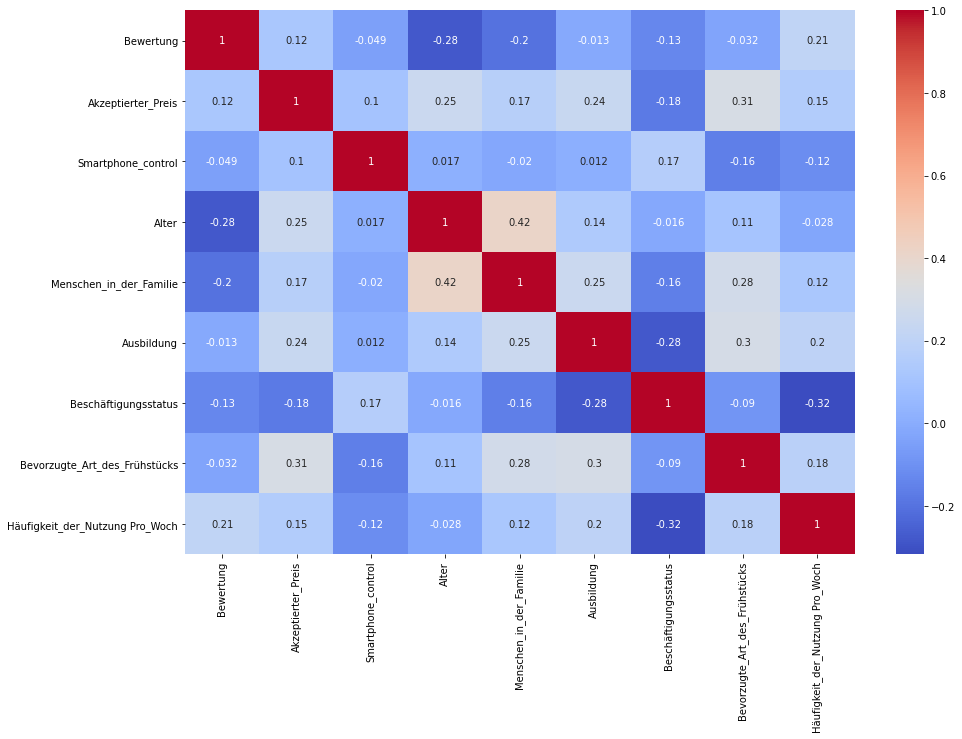

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot= True,cmap='coolwarm')
plt.show()

From Correlation plot it is clear that, The features dony have any strong correlation with each other 

## 4. Model Training

**4.1 Using KMeans algorithm for training the model with customer survey data** 

For initial experiment I have assigned number of clusters = 3 

In [28]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

**4.2 Fitting the model and Preparing new column of 'Segment' in dataset with predicted segment for each customer** 

In [45]:
df['Segment']= model.fit_predict(df.drop('Umfrage_ID',axis=1))

In [46]:
df.head()

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment
0,BS001,5,25,0,26,2,1,4,1,1,1
1,BS002,4,40,1,30,4,1,3,2,4,1
2,BS003,3,30,0,42,3,1,2,2,6,2
3,BS004,4,40,0,28,4,1,0,2,3,1
4,BS005,2,40,1,30,4,1,4,2,1,1


## 5. Finding the value of Number of clusters(k) using Elbow method

**5.1 Computing Sum of Squared errors against Number of clusters to find optimum value of 'K'** 

Preparing List of Sum of Squared errors for clusters ranging from 1 to 10

In [47]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    model= KMeans(n_clusters=k)
    model.fit(df.drop('Umfrage_ID',axis=1))
    sse.append(model.inertia_)

**5.2 Plotting the SSE against number of clusters**

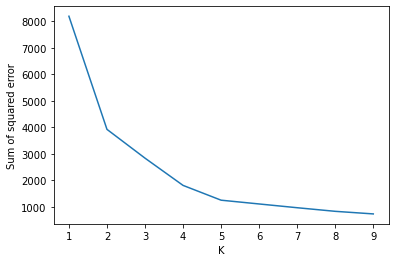

In [48]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

From above plot we can select the number of Clusters = 5 

## 6. Retraining the model with k = 5

**6.1 Modeling and predicting the segment with 5 clusters**

In [49]:
model = KMeans(n_clusters=5)

In [50]:
df['Final_Segment']= model.fit_predict(df.drop('Umfrage_ID',axis=1))

In [52]:
df.head()

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
0,BS001,5,25,0,26,2,1,4,1,1,1,4
1,BS002,4,40,1,30,4,1,3,2,4,1,3
2,BS003,3,30,0,42,3,1,2,2,6,2,0
3,BS004,4,40,0,28,4,1,0,2,3,1,3
4,BS005,2,40,1,30,4,1,4,2,1,1,3


## 7. Segmant observation

**7.1 Clustomers in Segment '0'**

In [59]:
seg_0 = df[df.Final_Segment == 0]
seg_0

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
2,BS003,3,30,0,42,3,1,2,2,6,2,0
6,BS007,4,30,1,30,1,0,0,0,3,1,0
7,BS008,1,30,0,35,1,1,4,2,1,1,0
8,BS009,5,30,0,39,4,3,1,2,5,2,0
20,BS021,4,30,0,32,1,1,0,2,7,1,0
24,BS025,5,30,1,34,1,1,4,2,0,1,0
26,BS027,2,30,2,39,2,3,0,2,3,2,0
32,BS033,2,30,0,42,2,2,2,1,2,2,0


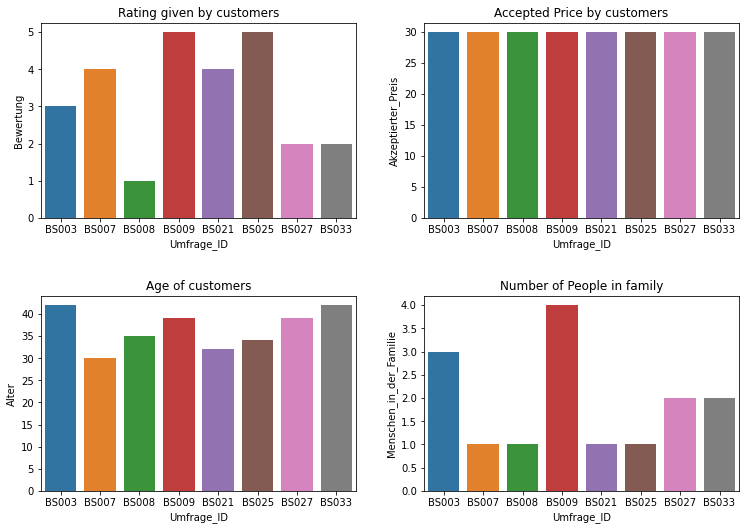

In [84]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x= seg_0.Umfrage_ID,y=seg_0.Bewertung )
plt.title('Rating given by customers')
plt.show

plt.subplot(2,2,2)
sns.barplot(x= seg_0.Umfrage_ID,y=seg_0.Akzeptierter_Preis )
plt.title('Accepted Price by customers')
plt.show

plt.subplot(2,2,3)
sns.barplot(x= seg_0.Umfrage_ID,y=seg_0.Alter )
plt.title('Age of customers')
plt.show

plt.subplot(2,2,4)
sns.barplot(x= seg_0.Umfrage_ID,y=seg_0.Menschen_in_der_Familie )
plt.title('Number of People in family')
plt.show


plt.tight_layout(pad=3.0)

**7.2 Clustomers in Segment '1'**

In [60]:
seg_1 = df[df.Final_Segment == 1]
seg_1

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
13,BS014,1,50,0,42,3,2,2,2,1,0,1
14,BS015,1,50,1,56,4,2,2,2,3,0,1
15,BS016,3,50,1,60,3,1,2,2,5,0,1
18,BS019,4,40,2,50,4,2,2,2,3,0,1
30,BS031,5,50,0,51,4,2,2,2,3,0,1
36,BS037,2,40,1,54,3,1,2,2,4,0,1


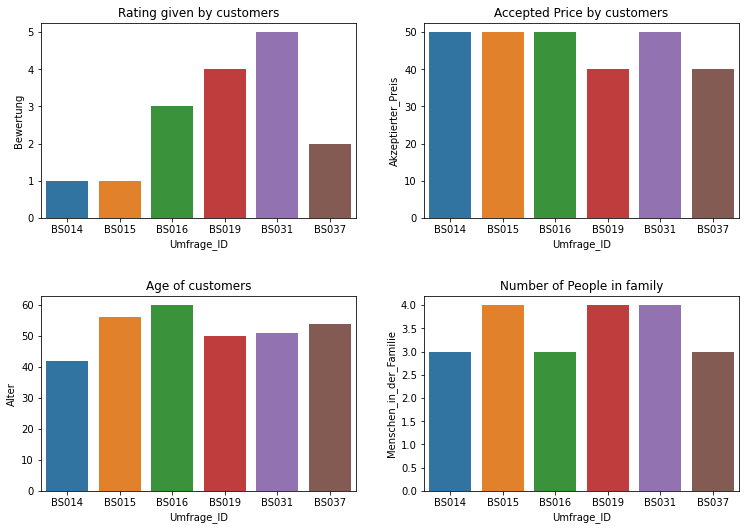

In [91]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x= seg_1.Umfrage_ID,y=seg_1.Bewertung )
plt.title('Rating given by customers')
plt.show

plt.subplot(2,2,2)
sns.barplot(x= seg_1.Umfrage_ID,y=seg_1.Akzeptierter_Preis )
plt.title('Accepted Price by customers')
plt.show

plt.subplot(2,2,3)
sns.barplot(x= seg_1.Umfrage_ID,y=seg_1.Alter )
plt.title('Age of customers')
plt.show

plt.subplot(2,2,4)
sns.barplot(x= seg_1.Umfrage_ID,y=seg_1.Menschen_in_der_Familie )
plt.title('Number of People in family')
plt.show

plt.tight_layout(pad=3.0)

**7.3 Clustomers in Segment '2'**

In [61]:
seg_2 = df[df.Final_Segment == 2]
seg_2

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
33,BS034,2,30,1,52,4,2,2,2,2,2,2
35,BS036,1,25,0,58,3,2,2,2,1,2,2
37,BS038,1,25,0,56,3,1,2,1,2,2,2


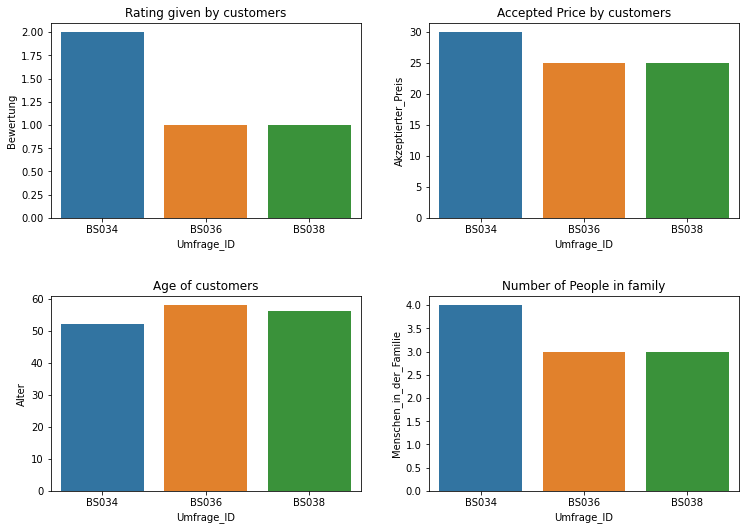

In [86]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x= seg_2.Umfrage_ID,y=seg_2.Bewertung )
plt.title('Rating given by customers')
plt.show

plt.subplot(2,2,2)
sns.barplot(x= seg_2.Umfrage_ID,y=seg_2.Akzeptierter_Preis )
plt.title('Accepted Price by customers')
plt.show

plt.subplot(2,2,3)
sns.barplot(x= seg_2.Umfrage_ID,y=seg_2.Alter )
plt.title('Age of customers')
plt.show

plt.subplot(2,2,4)
sns.barplot(x= seg_2.Umfrage_ID,y=seg_2.Menschen_in_der_Familie )
plt.title('Number of People in family')
plt.show


plt.tight_layout(pad=3.0)

**7.4 Clustomers in Segment '3'**

In [62]:
seg_3 = df[df.Final_Segment == 3]
seg_3

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
1,BS002,4,40,1,30,4,1,3,2,4,1,3
3,BS004,4,40,0,28,4,1,0,2,3,1,3
4,BS005,2,40,1,30,4,1,4,2,1,1,3
10,BS011,4,40,1,26,3,3,0,2,6,1,3
11,BS012,4,40,0,28,1,1,0,2,2,1,3
16,BS017,4,40,0,27,4,3,0,2,7,1,3
17,BS018,4,40,1,34,3,3,0,2,3,1,3
19,BS020,5,40,0,30,2,1,0,2,3,1,3
21,BS022,3,50,0,26,1,3,0,2,3,1,3
23,BS024,2,40,1,22,1,1,4,2,2,1,3


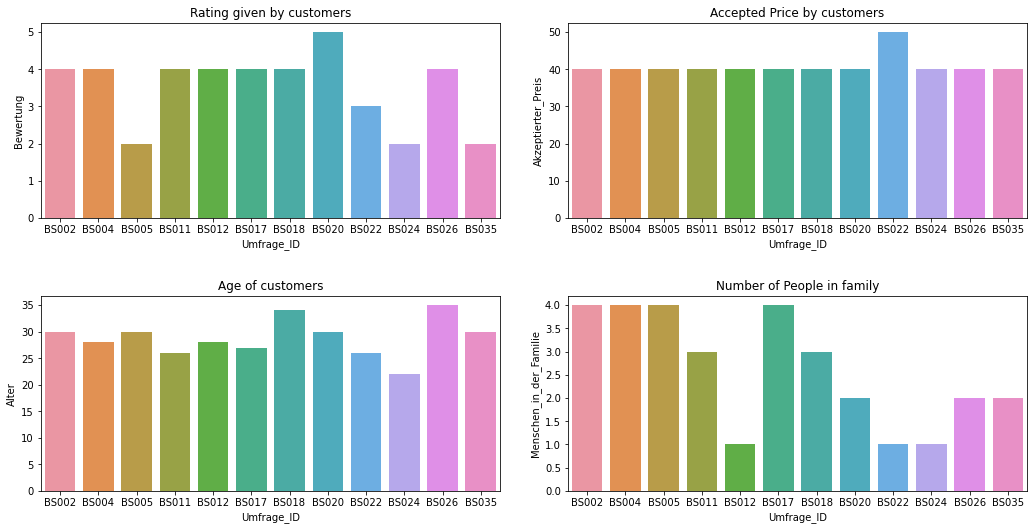

In [88]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
sns.barplot(x= seg_3.Umfrage_ID,y=seg_3.Bewertung )
plt.title('Rating given by customers')
plt.show

plt.subplot(2,2,2)
sns.barplot(x= seg_3.Umfrage_ID,y=seg_3.Akzeptierter_Preis )
plt.title('Accepted Price by customers')
plt.show

plt.subplot(2,2,3)
sns.barplot(x= seg_3.Umfrage_ID,y=seg_3.Alter )
plt.title('Age of customers')
plt.show

plt.subplot(2,2,4)
sns.barplot(x= seg_3.Umfrage_ID,y=seg_3.Menschen_in_der_Familie )
plt.title('Number of People in family')
plt.show


plt.tight_layout(pad=3.0)

**7.5 Clustomers in Segment '4'**

In [63]:
seg_4 = df[df.Final_Segment == 4]
seg_4

,Umfrage_ID,Bewertung,Akzeptierter_Preis,Smartphone_control,Alter,Menschen_in_der_Familie,Ausbildung,Beschäftigungsstatus,Bevorzugte_Art_des_Frühstücks,Häufigkeit_der_Nutzung Pro_Woch,Segment,Final_Segment
0,BS001,5,25,0,26,2,1,4,1,1,1,4
5,BS006,1,25,1,21,4,1,0,2,1,1,4
9,BS010,4,30,0,19,1,0,0,2,5,1,4
12,BS013,4,30,0,27,1,3,4,2,4,1,4
22,BS023,3,30,2,18,1,1,4,0,2,1,4
27,BS028,3,30,1,21,1,1,4,2,2,1,4
28,BS029,4,30,1,23,1,1,4,2,2,1,4
29,BS030,1,25,0,26,4,1,4,2,7,1,4
31,BS032,2,25,0,26,4,2,1,2,0,1,4


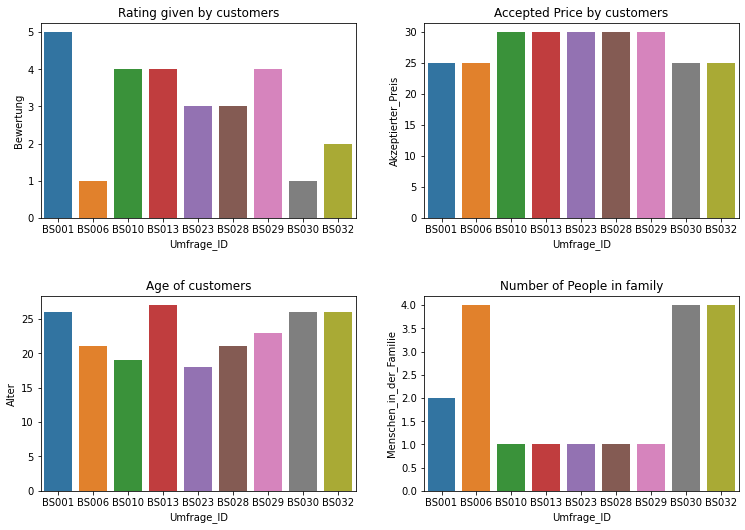

In [89]:
plt.figure(figsize=(11,8))
plt.subplot(2,2,1)
sns.barplot(x= seg_4.Umfrage_ID,y=seg_4.Bewertung )
plt.title('Rating given by customers')
plt.show

plt.subplot(2,2,2)
sns.barplot(x= seg_4.Umfrage_ID,y=seg_4.Akzeptierter_Preis )
plt.title('Accepted Price by customers')
plt.show

plt.subplot(2,2,3)
sns.barplot(x= seg_4.Umfrage_ID,y=seg_4.Alter )
plt.title('Age of customers')
plt.show

plt.subplot(2,2,4)
sns.barplot(x= seg_4.Umfrage_ID,y=seg_4.Menschen_in_der_Familie )
plt.title('Number of People in family')
plt.show


plt.tight_layout(pad=3.0)

## 8. Conclusion

**From above analysis it is benificial to focus on customers from Segment'1' due to following factors**

1. They are ready to pay high price,
2. People from Age group 40-60 are willing to reduce their efforts by using such kind of equipments
3. They have more than 3 People in their family which makes sense in using this equipment from Time and energy saving point of view
4. Frequency of using Toaster is also good from these people

